In [57]:
%matplotlib inline


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

charity_data = "cleaned_data.csv"
charity_df = pd.read_csv("cleaned_data.csv")
charity_df.head()
cat = charity_df[['Category Name', 'Rating', 'Contributions']]
cat

,Category Name,Rating,Contributions
0,Research and Public Policy,92.61,12924245.0
1,Community Development,81.84,2438155.0
2,Health,93.16,331241336.0
3,"Arts, Culture, Humanities",80.31,2219692.0
4,Human Services,91.54,3859985.0
5,Community Development,84.80,1287903.0
6,Human Services,98.18,7685418.0
7,Animals,84.61,4461797.0
8,Animals,82.26,1454644.0
9,Human Services,91.21,3228440.0


In [58]:
catlist = ["Animals","Arts, Culture, Humanities", "Community Development", "Environment", "Health", "Human Services", "Human and Civil Rights", "International", "Religion","Research and Public Policy","Education"]

def getContributionCount (catname):
    return cat.loc[cat['Category Name'] == catname].Contributions.count()

countlist = [getContributionCount(i) for i in catlist]

def getRatingMean (catname):
    return cat.loc[cat['Category Name'] == catname].Rating.mean()

meanlist = [getRatingMean(i) for i in catlist]

def getBubble (catname):
    return cat.loc[cat['Category Name'] == catname].Contributions.sum()

sumlist = [getBubble(i) for i in catlist]
finalist = [i/10000000 for i in sumlist]

color =['red', 'lightblue', 'lightgreen', 'black', 'lightyellow', 'grey', 'green', 'yellow', 'mediumblue', 'peru', 'pink']

df = pd.DataFrame(dict(countlist=countlist, meanlist=meanlist, color=color,catlist=catlist, sumlist=sumlist))
df

,countlist,meanlist,color,catlist,sumlist
0,480,87.910166,red,Animals,7.743869e+09
1,1225,85.184247,lightblue,"Arts, Culture, Humanities",2.849131e+10
2,805,88.736799,lightgreen,Community Development,2.647958e+10
3,440,87.883597,black,Environment,7.616163e+09
4,891,85.569777,lightyellow,Health,2.845251e+10
5,2413,87.638631,grey,Human Services,4.375243e+10
6,363,85.648791,green,Human and Civil Rights,3.752142e+09
7,621,87.318640,yellow,International,2.691223e+10
8,459,80.535862,mediumblue,Religion,4.844083e+09
9,216,84.965602,peru,Research and Public Policy,4.378597e+09


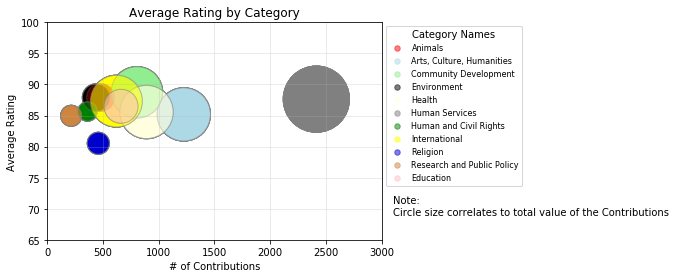

In [59]:
fig, ax = plt.subplots()

for i in catlist:
    ax.scatter(df['countlist'], df['meanlist'], marker="o",c=df['color'], edgecolors="grey",
           s=finalist, alpha=.5, label= i)

# Incorporate the other graph properties
plt.ylim(65, 100)
plt.xlim(0, 3000)
plt.grid(axis='both', alpha=0.30)
plt.xlabel("# of Contributions")
plt.ylabel("Average Rating")
plt.title("Average Rating by Category",fontsize =12)
plt.text(x=3100, y=69, s='Note:\nCircle size correlates to total value of the Contributions')
plt.figsize=(20, 15)
plt.layout=(2,1)

# Create a legend
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc=2, fontsize=8)
for i in range(len(catlist)):
    lgnd.legendHandles[i]._sizes = [30]
    lgnd.legendHandles[i].set_color(df['color'][i])
lgnd.set_title("Category Names", prop={"size":10})
plt.savefig("bubblechart.png",  bbox_inches="tight")